In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [2]:
with open("opt_real.json", "r") as f:
    loaded_data = json.load(f)

# Extract lists
exp_Z_opt = loaded_data["exp_Z"]
exp_ZZ_opt = loaded_data["exp_ZZ"]
var_Z_opt = loaded_data["var_Z"]
var_ZZ_opt = loaded_data["var_ZZ"]

In [3]:
with open("base_real.json", "r") as f:
    loaded_data = json.load(f)

# Extract lists
exp_Z_base = loaded_data["exp_Z"]
exp_ZZ_base = loaded_data["exp_ZZ"]
var_Z_base = loaded_data["var_Z"]
var_ZZ_base = loaded_data["var_ZZ"]

In [4]:
with open("qutip.json", "r") as f:
    loaded_data = json.load(f)

# Extract lists
exp_Z_g = loaded_data["exp_Z"]
exp_ZZ_g = loaded_data["exp_ZZ"]

In [5]:
with open("opt.json", "r") as f:
    loaded_data = json.load(f)

# Extract lists
exp_Z_opt_g = loaded_data["exp_Z"]
exp_ZZ_opt_g = loaded_data["exp_ZZ"]

In [6]:
with open("base.json", "r") as f:
    loaded_data = json.load(f)

# Extract lists
exp_Z_base_g = loaded_data["exp_Z"]
exp_ZZ_base_g = loaded_data["exp_ZZ"]

In [7]:
ls1 = np.arange(6.0, 20.1, 0.1)
ls2 = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
colors = sns.color_palette("rocket", 6)

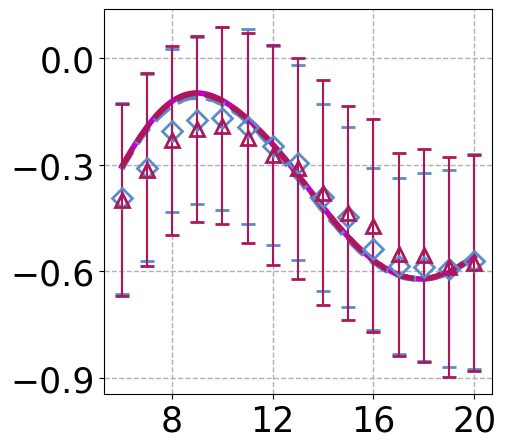

In [8]:
plt.figure(figsize=(5, 5))
plt.plot(ls1, exp_Z_g, linestyle='-', color='m', label="TH", linewidth=4)
plt.plot(ls1, exp_Z_opt_g, linestyle='--', color="#5A8CCB", label="QTurbo_TH", linewidth=4)
plt.errorbar(ls2, exp_Z_opt, yerr=np.sqrt(var_Z_opt), linestyle='none', marker='D', markerfacecolor='none', markersize=10, markeredgewidth=2, color="#5A8CCB", capsize=5, label="QTurbo")
plt.plot(ls1, exp_Z_base_g, linestyle='--', color=colors[2], label="SimuQ_TH", linewidth=4)
plt.errorbar(ls2, exp_Z_base, yerr=np.sqrt(var_Z_base), linestyle='none', marker='^', markerfacecolor='none', markersize=10, markeredgewidth=2, color=colors[2], capsize=5, label="SimuQ")
# plt.plot(ls2, exp_Z_opt, marker='s', linestyle='-', color='r', label="opt")
# plt.plot(ls2, exp_Z_opt, linestyle='none', marker='s', markerfacecolor='none', markersize=15, markeredgewidth=4, linewidth=1, color=colors[5], label="QTurbo")
plt.grid(True, linestyle='--', linewidth=1.0)
# plt.xlabel("Evolution Time")
# plt.ylabel("Z values")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# plt.xlim(2, 21)
# plt.axvline(x=4, color='r', linestyle='--', linewidth=3)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))  
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.3)) 
# plt.legend(fontsize=15, framealpha=0.7)
# plt.ylim(-1, 1)
plt.savefig("Z Expectation Value.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
z_reduction = []
E_opt = 0
E_base = 0
for i in range(15):
    err_opt = abs(exp_Z_opt[i]-exp_Z_g[10*i])
    err_base = abs(exp_Z_base[i]-exp_Z_g[10*i])
    E_opt = E_opt + err_opt
    E_base = E_base + err_base
    z_reduction.append((err_base-err_opt)/err_base*100)
print(z_reduction)
print((E_base-E_opt)/E_base*100)

[4.580997854343496, 4.711576419783595, 25.04724179065729, 25.019913686263145, 29.306496087064847, 59.04828803913076, 87.19119893244488, -79.10262228355481, 33.092033762636554, 15.697552772278426, 66.70540104975994, 56.749245316159005, 50.69455811226653, 31.23853385842156, 26.459198620170067]
30.299498546647285


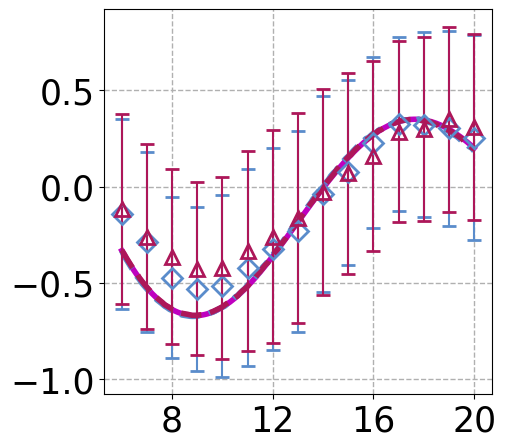

In [10]:
plt.figure(figsize=(5, 5))
plt.plot(ls1, exp_ZZ_g, linestyle='-', color='m', label="TH", linewidth=4)
plt.plot(ls1, exp_ZZ_opt_g, linestyle='--', color="#5A8CCB", label="QTurbo_TH", linewidth=4)
plt.errorbar(ls2, exp_ZZ_opt, yerr=np.sqrt(var_ZZ_opt), linestyle='none', marker='D', markerfacecolor='none', markersize=10, markeredgewidth=2, color="#5A8CCB", capsize=5, label="QTurbo")
plt.plot(ls1, exp_ZZ_base_g, linestyle='--', color=colors[2], label="SimuQ_TH", linewidth=4)
plt.errorbar(ls2, exp_ZZ_base, yerr=np.sqrt(var_ZZ_base), linestyle='none', marker='^', markerfacecolor='none', markersize=10, markeredgewidth=2, color=colors[2], capsize=5, label="SimuQ")
# plt.plot(ls2, exp_Z_opt, marker='s', linestyle='-', color='r', label="opt")
# plt.plot(ls2, exp_ZZ_opt, linestyle='none', marker='s', markerfacecolor='none', markersize=15, markeredgewidth=4, linewidth=1, color=colors[5], label="QTurbo")
plt.grid(True, linestyle='--', linewidth=1.0)
# plt.xlabel("Evolution Time")
# plt.ylabel("Z values")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# plt.xlim(2, 21)
# plt.axvline(x=4, color='r', linestyle='--', linewidth=3)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))  
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5)) 
# plt.legend(fontsize=15, framealpha=0.7)
# plt.ylim(-1, 1)
plt.savefig("ZZ Expectation Value.png", dpi=300, bbox_inches="tight")
plt.show()

In [11]:
zz_reduction = []
E_opt = 0
E_base = 0
for i in range(15):
    err_opt = abs(exp_ZZ_opt[i]-exp_ZZ_g[10*i])
    err_base = abs(exp_ZZ_base[i]-exp_ZZ_g[10*i])
    E_opt = E_opt + err_opt
    E_base = E_base + err_base
    zz_reduction.append((err_base-err_opt)/err_base*100)
print(zz_reduction)
print((E_base-E_opt)/E_base*100)

[12.170709319662773, 10.085230158875492, 39.39519017538788, 43.68169832904616, 45.500966715530595, 47.394827480258286, 64.89810487668946, -115.54034912093213, -61.181712552526726, 4.020611711340518, 62.490505333955745, 73.94164973292622, 47.543498135767294, 91.83262693030704, 49.69126236382449]
35.76024558825846
